# Art &The New York Times &The Financial Times & keywords

In [1]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

import blaze
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

## NYT & FT

In [3]:
nyt_data = pd.read_csv('art_nyt_data.csv')

In [4]:
ft_data = pd.read_csv('art_ft_data.csv')

In [5]:
def get_ngrams(sentence):
    result = []
    tokens = nltk.word_tokenize(sentence.lower())
    tokens = [t for t in tokens if t not in string.punctuation]
    for n in range(1, 4):
        result.extend(ngrams(tokens, n))
    result = [' '.join(r) for r in result]
    return result

In [6]:
def get_ngrams_df(df, sentiment=None): # sentiment = pos, neg
    result = []
    for index, row in df.iterrows():
        if not sentiment:
            result.extend(get_ngrams(row['sentence']))
        if sentiment == 'pos' and row['sentiment'] == 'pos':
            result.extend(get_ngrams(row['sentence']))
        if sentiment == 'neg' and row['sentiment'] == 'neg':
            result.extend(get_ngrams(row['sentence']))
    return result

In [7]:
nytt = get_ngrams_df(nyt_data)

In [8]:
len(nytt)

1260867

In [9]:
# nytp = get_ngrams_df(nyt_data, 'pos')

In [11]:
# len(nytp)

983391

In [10]:
# nytn = get_ngrams_df(nyt_data, 'neg')

In [13]:
# len(nytn)

277476

In [11]:
ftt = get_ngrams_df(ft_data)

In [12]:
len(ftt)

318960

In [13]:
# ftp = get_ngrams_df(ft_data, 'pos')

In [17]:
# len(ftp)

237084

In [14]:
# ftn = get_ngrams_df(ft_data, 'neg')

In [19]:
# len(ftn)

81876

In [84]:
len(nytt) / len(ftt)

3.9530568096313017

In [15]:
def all_are_stopwords(ngr):
    tokens = set(nltk.word_tokenize(ngr))
    return tokens.intersection(stopwords.words('english')) == tokens

def top_words(data, n):
    result = []
    fd = nltk.FreqDist(data)
    most_common = fd.most_common()
    count = 0
    for w, f in most_common:
        if not all_are_stopwords(w):
            result.append(w)
            count += 1
        if count >= n:
            break
    return result

def top_words_freq(data, n):
    result = []
    fd = nltk.FreqDist(data)
    most_common = fd.most_common()
    count = 0
    for w, f in most_common:
        if not all_are_stopwords(w):
            result.append((w, f))
            count += 1
        if count >= n:
            break
    return result

In [16]:
nyttt = top_words(nytt, 50)

In [17]:
len(nyttt)

50

In [18]:
fttt = top_words(ftt, 50)

In [19]:
len(fttt)

50

In [20]:
inter = set(nyttt).intersection(fttt)

In [21]:
len(inter)

22

In [22]:
nyttt = top_words_freq(nytt, 50)

In [23]:
nyttt

[('director', 5547),
 ('art', 5453),
 ('executive', 4857),
 ('arts', 3693),
 ("'s", 3092),
 ('artistic', 2976),
 ('manager', 2647),
 ('founder', 2493),
 ('new', 2446),
 ('artistic director', 2415),
 ('said', 2229),
 ('executive director', 2054),
 ('director of', 1863),
 ('artists', 1861),
 ("''", 1859),
 ('m', 1599),
 ('artist', 1395),
 ('museum', 1378),
 ('center', 1307),
 ('theater', 1217),
 ('founder of', 1206),
 ('mr.', 1152),
 ('york', 1137),
 ('company', 1112),
 ('new york', 1106),
 ('director of the', 1090),
 ('chief', 1016),
 ('executive director of', 981),
 ('president', 962),
 ('chief executive', 878),
 ('music', 834),
 ('general', 812),
 ('and artistic', 809),
 ('museum of', 807),
 ('the arts', 798),
 ('founder and', 787),
 ('and artistic director', 780),
 ('chairman', 752),
 ('of art', 740),
 ('--', 737),
 ('the art', 707),
 ('the founder', 656),
 ('producer', 654),
 ('the executive', 650),
 ('like', 648),
 ('founder of the', 640),
 ('production', 632),
 ('presented', 619),

In [24]:
nyttt = [
    ('director', 5547),
    ('art', 5453),
    ('executive', 4857),
    ('arts', 3693),
    ('artistic', 2976),
    ('manager', 2647),
    ('founder', 2493),
    ('new', 2446),
    ('artistic director', 2415),
    ('said', 2229),
    ('executive director', 2054),
    ('artists', 1861),
    ('artist', 1395),
    ('museum', 1378),
    ('center', 1307),
    ('theater', 1217),
    ('mr.', 1152),
    ('york', 1137),
    ('company', 1112),
    ('new york', 1106),
    ('chief', 1016),
    ('president', 962),
    ('chief executive', 878),
    ('music', 834),
    ('general', 812),
    ('chairman', 752),
    ('producer', 654),
    ('like', 648),
    ('production', 632),
    ('presented', 619),
    ('american', 615)
]

In [25]:
len(nyttt)

31

In [26]:
fttt = top_words_freq(ftt, 50)

In [27]:
fttt

[("'s", 1337),
 ('art', 1307),
 ('executive', 1128),
 ('``', 968),
 ("''", 891),
 ('chief', 860),
 ('chief executive', 805),
 ('arts', 628),
 ('artists', 488),
 ('founder', 483),
 ('executive of', 448),
 ('chairman', 440),
 ('chief executive of', 439),
 ('new', 392),
 ('says', 367),
 ('said', 358),
 ('artist', 340),
 ('manager', 285),
 ('director', 283),
 ('company', 279),
 ('former', 257),
 ('group', 253),
 ('music', 248),
 ('ceo', 237),
 ('founder of', 235),
 ('one', 222),
 ('business', 217),
 ('year', 206),
 ('president', 203),
 ("'' says", 185),
 ('chairman and', 185),
 ('and ceo', 173),
 ('co-founder', 168),
 ('london', 167),
 ('artistic', 162),
 ('electronic', 159),
 ('quot', 158),
 ('mr', 155),
 ('the art', 155),
 ('electronic arts', 154),
 ('would', 154),
 ('first', 144),
 ('also', 144),
 ('us', 140),
 ('contemporary', 137),
 ('of art', 136),
 ('last', 136),
 ('apple', 136),
 ('google', 136),
 ('entrepreneur', 133)]

In [256]:
fttt = [
    ('art', 1307),
    ('executive', 1128),
    ('chief', 860),
    ('chief executive', 805),
    ('arts', 628),
    ('artists', 488),
    ('founder', 483),
    ('chairman', 440),
    ('new', 392),
    ('says', 367),
    ('said', 358),
    ('artist', 340),
    ('manager', 285),
    ('director', 283),
    ('company', 279),
    ('former', 257),
    ('group', 253),
    ('music', 248),
    ('ceo', 237),
    ('one', 222),
    ('business', 217),
    ('year', 206),
    ('president', 203),
    ('co-founder', 168),
    ('london', 167),
    ('artistic', 162),
    ('electronic', 159),
    ('quot', 158),
    ('mr.', 155),
    ('would', 154),
    ('electronic arts', 154),
    ('also', 144),
    ('first', 144),
    ('us', 140),
    ('contemporary', 137),
    ('last', 136),
    ('google', 136),
    ('apple', 136),
    ('entrepreneur', 133)
]

In [257]:
len(fttt)

39

In [258]:
nyt_dict = dict(nyttt)
nyt_dict

{'american': 615,
 'art': 5453,
 'artist': 1395,
 'artistic': 2976,
 'artistic director': 2415,
 'artists': 1861,
 'arts': 3693,
 'center': 1307,
 'chairman': 752,
 'chief': 1016,
 'chief executive': 878,
 'company': 1112,
 'director': 5547,
 'executive': 4857,
 'executive director': 2054,
 'founder': 2493,
 'general': 812,
 'like': 648,
 'manager': 2647,
 'mr.': 1152,
 'museum': 1378,
 'music': 834,
 'new': 2446,
 'new york': 1106,
 'presented': 619,
 'president': 962,
 'producer': 654,
 'production': 632,
 'said': 2229,
 'theater': 1217,
 'york': 1137}

In [259]:
ft_dict = dict(fttt)
ft_dict

{'also': 144,
 'apple': 136,
 'art': 1307,
 'artist': 340,
 'artistic': 162,
 'artists': 488,
 'arts': 628,
 'business': 217,
 'ceo': 237,
 'chairman': 440,
 'chief': 860,
 'chief executive': 805,
 'co-founder': 168,
 'company': 279,
 'contemporary': 137,
 'director': 283,
 'electronic': 159,
 'electronic arts': 154,
 'entrepreneur': 133,
 'executive': 1128,
 'first': 144,
 'former': 257,
 'founder': 483,
 'google': 136,
 'group': 253,
 'last': 136,
 'london': 167,
 'manager': 285,
 'mr.': 155,
 'music': 248,
 'new': 392,
 'one': 222,
 'president': 203,
 'quot': 158,
 'said': 358,
 'says': 367,
 'us': 140,
 'would': 154,
 'year': 206}

In [260]:
nyt_dict = dict(nyttt)
ft_dict = dict(fttt)

In [261]:
nyt_sr = pd.Series(nyt_dict)

In [262]:
ft_sr = pd.Series(ft_dict)

In [263]:
news_df = pd.DataFrame({
        'The New York Times': nyt_sr,
        'The Financial Times': ft_sr,
})

In [264]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


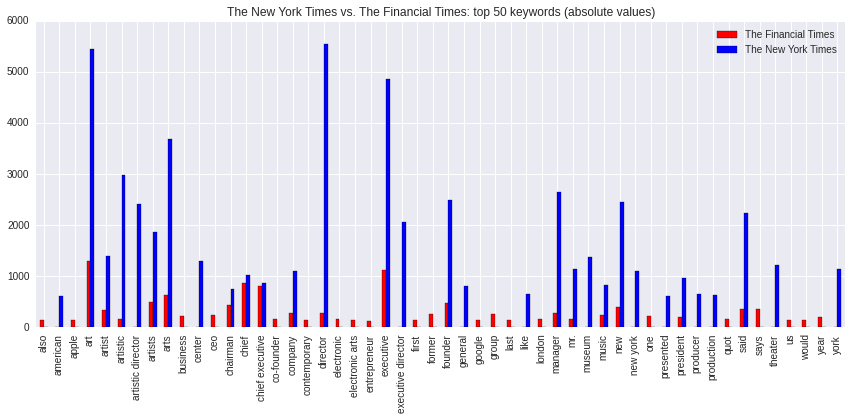

In [265]:
news_df.plot(kind='bar', color=['r', 'b'], title='The New York Times vs. The Financial Times: top 50 keywords (absolute values)')

In [266]:
norm_ft_dict = {}
for k in ft_dict:
    norm_ft_dict[k] = ft_dict[k] * 4 / 6000

norm_nyt_dict = {}
for k in nyt_dict:
    norm_nyt_dict[k] = nyt_dict[k] / 6000

In [267]:
norm_nyt_sr = pd.Series(norm_nyt_dict)

In [268]:
norm_ft_sr = pd.Series(norm_ft_dict)

In [269]:
norm_news_df = pd.DataFrame({
        'The New York Times': norm_nyt_sr,
        'The Financial Times': norm_ft_sr,
})

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


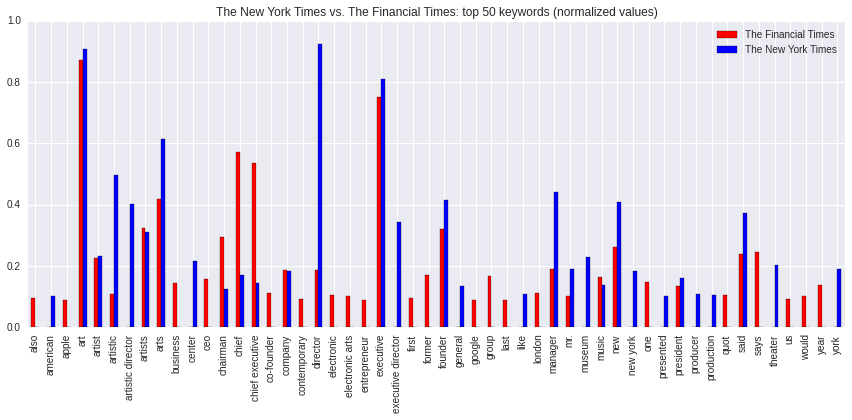

In [270]:
norm_news_df.plot(kind='bar', color=['r', 'b'], title='The New York Times vs. The Financial Times: top 50 keywords (normalized values)')

In [114]:
len(set(nyt_dict.keys()).union(ft_dict.keys()))

53

## ARTSY & TWITTER

In [115]:
import pickle

In [116]:
hashtags_data = pd.read_csv('art_twitter_top_hashtags.csv')

In [117]:
hashtags_data.head()

,hashtag,deg
0,art,1900909
1,photography,242065
2,painting,226498
3,photo,148847
4,streetart,126865


In [207]:
with open('gene_freqs.pickle', 'rb') as f:
    gene_freqs = pickle.load(f)

In [208]:
with open('total_gene_freqs.pickle', 'rb') as f:
    total_gene_freqs = pickle.load(f)

In [219]:
len(gene_freqs)

443

In [220]:
len(total_gene_freqs)

560

In [223]:
len(set(total_gene_freqs.keys()).union(gene_freqs.keys()))

560

In [209]:
with open('gene_list.pickle', 'rb') as f:
    gene_list = pickle.load(f)

In [224]:
gene_freqs_data = pd.DataFrame(list(gene_freqs.items()))

In [225]:
len(gene_freqs_data)

443

In [226]:
gene_freqs_data.head()

,0,1
0,Classical Mythology,58
1,Earth Tones,14
2,Northern Renaissance,139
3,Silver,2
4,History Painting,27


In [227]:
hashtag_dict = {}
for index, row in hashtags_data[1:51].iterrows():
    hashtag_dict[row['hashtag']] = row['deg']

In [228]:
gene_dict = {}
for index, row in gene_freqs_data.sort([1], ascending=[0])[:50].iterrows():
    gene_dict[row[0].lower()] = row[1]

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


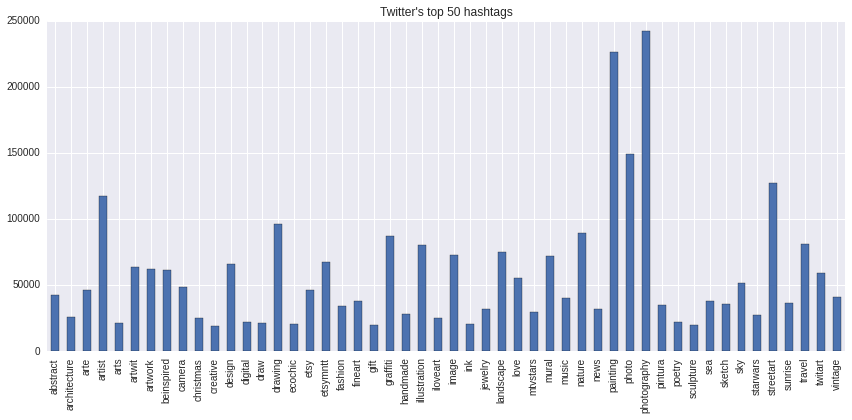

In [232]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
pd.Series(hashtag_dict).plot(kind='bar', title='Twitter\'s top 50 hashtags')

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


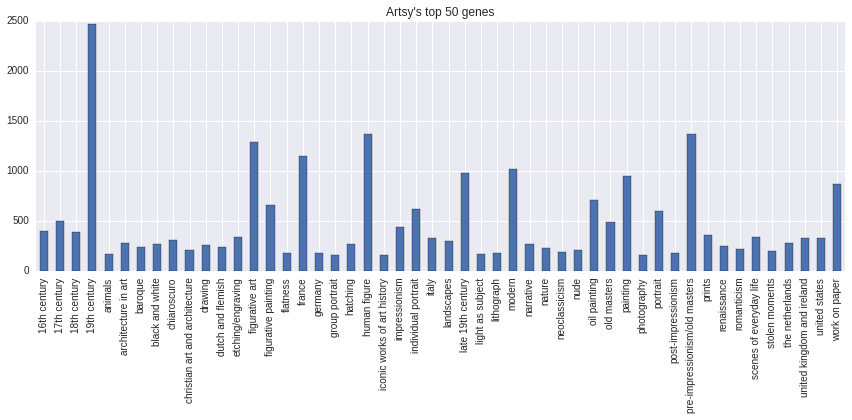

In [230]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
pd.Series(gene_dict).plot(kind='bar', title='Artsy\'s top 50 genes')

In [231]:
set(gene_dict.keys()).intersection(hashtag_dict.keys())

{'drawing', 'nature', 'painting', 'photography'}